### Stanford Dog Breed 데이터 세트를 아래 URL에서 직접 Download 및 압축 해제
* Kaggle의 Dataset으로 Object Storage 연결 시 이미지를 한장 씩 읽는 데 많은 시간이 소요되어 모델 학습에 시간이 더 걸림. -> 읽는데 시간이 오래 걸려서 GPU utilization이 안됨.
* Local Disk에 바로 이미지를 다운로드/압축 해제 후 모델에서 이를 이용할 수 있도록 함. 

In [1]:
# stanford dog breed 데이터 세트 다운로드 
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
# 현재 디렉토리인 /kaggle/working에 바로 압축 해제 
!ls; tar -xvf images.tar

--2022-02-02 06:08:15--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82M  18.6MB/s    in 44s     

2022-02-02 06:08:59 (17.2 MB/s) - ‘images.tar’ saved [793579520/793579520]

__notebook_source__.ipynb  images.tar
Images/
Images/n02085620-Chihuahua/
Images/n02085620-Chihuahua/n02085620_10621.jpg
Images/n02085620-Chihuahua/n02085620_10976.jpg
Images/n02085620-Chihuahua/n02085620_11238.jpg
Images/n02085620-Chihuahua/n02085620_11258.jpg
Images/n02085620-Chihuahua/n02085620_11337.jpg
Images/n02085620-Chihuahua/n02085620_1152.jpg
Images/n02085620-Chihuahua/n02085620_11696.jpg
Images/n02085620-Chihuahua/n02085620_11818.jpg
Images/n02085620-Chihuahua/n02085620_

In [2]:
# 현재 디렉토리의 내용 확인. 
!ls; pwd

Images	__notebook_source__.ipynb  images.tar
/kaggle/working


In [3]:
!cd /kaggle/working/Images;ls

n02085620-Chihuahua			  n02100583-vizsla
n02085782-Japanese_spaniel		  n02100735-English_setter
n02085936-Maltese_dog			  n02100877-Irish_setter
n02086079-Pekinese			  n02101006-Gordon_setter
n02086240-Shih-Tzu			  n02101388-Brittany_spaniel
n02086646-Blenheim_spaniel		  n02101556-clumber
n02086910-papillon			  n02102040-English_springer
n02087046-toy_terrier			  n02102177-Welsh_springer_spaniel
n02087394-Rhodesian_ridgeback		  n02102318-cocker_spaniel
n02088094-Afghan_hound			  n02102480-Sussex_spaniel
n02088238-basset			  n02102973-Irish_water_spaniel
n02088364-beagle			  n02104029-kuvasz
n02088466-bloodhound			  n02104365-schipperke
n02088632-bluetick			  n02105056-groenendael
n02089078-black-and-tan_coonhound	  n02105162-malinois
n02089867-Walker_hound			  n02105251-briard
n02089973-English_foxhound		  n02105412-kelpie
n02090379-redbone			  n02105505-komondor
n02090622-borzoi			  n02105641-Old_English_sheepdog
n02090721-Irish_wolfhound		  n02105855-Shetland_sheepdog
n02091032-Itali

In [4]:
import numpy as np 
import pandas as pd 
import os

for dirname, _, filenames in os.walk('/kaggle/working/Images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/working/Images/n02101006-Gordon_setter/n02101006_6178.jpg
/kaggle/working/Images/n02101006-Gordon_setter/n02101006_8020.jpg
/kaggle/working/Images/n02101006-Gordon_setter/n02101006_1202.jpg
/kaggle/working/Images/n02101006-Gordon_setter/n02101006_1681.jpg
/kaggle/working/Images/n02101006-Gordon_setter/n02101006_3335.jpg
/kaggle/working/Images/n02101006-Gordon_setter/n02101006_7022.jpg
/kaggle/working/Images/n02101006-Gordon_setter/n02101006_1888.jpg
/kaggle/working/Images/n02101006-Gordon_setter/n02101006_3354.jpg
/kaggle/working/Images/n02101006-Gordon_setter/n02101006_1308.jpg
/kaggle/working/Images/n02101006-Gordon_setter/n02101006_338.jpg
/kaggle/working/Images/n02101006-Gordon_setter/n02101006_2516.jpg
/kaggle/working/Images/n02101006-Gordon_setter/n02101006_2113.jpg
/kaggle/working/Images/n02101006-Gordon_setter/n02101006_638.jpg
/kaggle/working/Images/n02101006-Gordon_setter/n02101006_4470.jpg
/kaggle/working/Images/n02101006-Gordon_setter/n02101006_1059.jpg
/kaggle/work

### 이미지 파일들의 디렉토리와 파일명을 기반으로 메타 정보인 이미지 절대경로, 레이블을 DataFrame으로 생성
* /kaggle/working/Images 디렉토리 밑에 Dog breed 서브 디렉토리와 이미지 파일로 구성 되어 있음. 
* 레이블 값은 이미지 파일의 절대경로에서 이미지 파일 바로 위에 있는 서브 디렉토리를 가공하여 생성. 

In [5]:
start_pos = '/kaggle/working/Images/n02109961-Eskimo_dog/n02109961_12338.jpg'.find('/', 20)
end_pos = '/kaggle/working/Images/n02109961-Eskimo_dog/n02109961_12338.jpg'.rfind('/')

tmp_breed = '/kaggle/working/Images/n02109961-Eskimo_dog/n02109961_12338.jpg'[start_pos + 1 : end_pos]
print(start_pos, end_pos, tmp_breed)
tmp_breed[tmp_breed.find('-') + 1 :]

22 43 n02109961-Eskimo_dog


'Eskimo_dog'

In [6]:
IMAGE_DIR = '/kaggle/working/Images' 

def make_dogbreed_dataframe(image_dir = IMAGE_DIR):
    paths = [] # 절대경로
    label_distinguish = [] # label 구분
    for dirname, _, filenames in os.walk(image_dir):
        for filename in filenames:
            # 이미지 파일이 아닌 파일도 해당 디렉토리에 있음.
            if '.jpg' in filename:
                # 파일의 절대 경로를 file_path 변수에 할당. 
                file_path = dirname + '/' + filename
                paths.append(file_path)
                # 이미지 파일의 절대 경로에서 레이블명 생성을 위한 1차 추출. '/'로 분할하여 파일 바로 위 서브디렉토리 이름 가져옴.  
                start_pos = file_path.find('/', 20)
                end_pos = file_path.rfind('/')
                tmp_breed = file_path[start_pos + 1 : end_pos] # n02086646-Blenheim_spaniel 추출
                # 1차 추출된 데이터를 기반으로 '-' 이후 데이터가 레이블 값임. 
                breed = tmp_breed[tmp_breed.find('-') + 1 :]
                #print(start_pos, end_pos, tmp_breed)
                label_distinguish.append(breed)

    data_df = pd.DataFrame({'path':paths, 'label':label_distinguish})
    return data_df


In [7]:
pd.set_option('display.max_colwidth', 200)
data_df = make_dogbreed_dataframe()
print('data_df shape:', data_df.shape)
data_df.head()

data_df shape: (20580, 2)


path  \
0  /kaggle/working/Images/n02101006-Gordon_setter/n02101006_6178.jpg   
1  /kaggle/working/Images/n02101006-Gordon_setter/n02101006_8020.jpg   
2  /kaggle/working/Images/n02101006-Gordon_setter/n02101006_1202.jpg   
3  /kaggle/working/Images/n02101006-Gordon_setter/n02101006_1681.jpg   
4  /kaggle/working/Images/n02101006-Gordon_setter/n02101006_3335.jpg   

           label  
0  Gordon_setter  
1  Gordon_setter  
2  Gordon_setter  
3  Gordon_setter  
4  Gordon_setter

### Dog Breed의 개별 분포도 확인. 

In [8]:
print(data_df.shape)
# breed 별 건수 확인
data_df['label'].value_counts()

(20580, 2)


Maltese_dog           252
Afghan_hound          239
Scottish_deerhound    232
Pomeranian            219
Samoyed               218
                     ... 
Border_collie         150
Doberman              150
malinois              150
Pekinese              149
redbone               148
Name: label, Length: 120, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119]),
 [Text(0, 0, 'Gordon_setter'),
  Text(1, 0, 'malamute'),
  Text(2, 0, 'German_short-haired_pointer'),
  Text(3, 0, 'Ibizan_hound'),
  Text(4, 0, 'borzoi'),
  Text(5, 0, 'miniature_pinscher'),
  Text(6, 0, 'bull_mastiff'),
  Text(7, 0, 'Pomeranian'),
  Text(8, 0, 'Kerry_blue_terrier'),
  Text(9, 0, 'Japanese_spaniel')

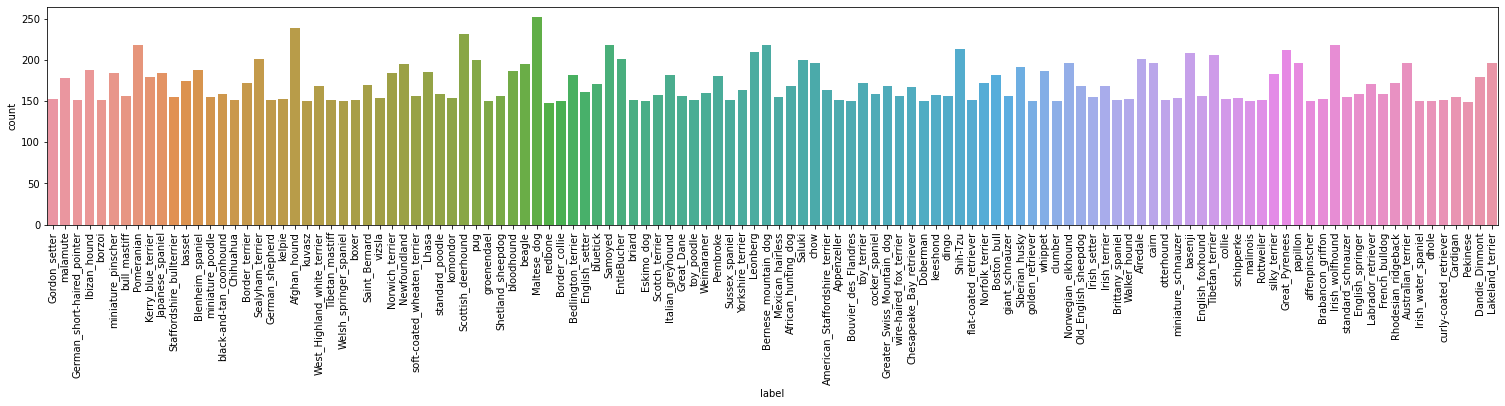

In [9]:
# 막대 그래프 형태로 breed별 건수 확인 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize = (26, 4))

sns.countplot(data = data_df, x = 'label')
plt.xticks(rotation = 90)

### Dog Breed의 이미지 보기

In [10]:
import cv2

# dog breed 별로 image를 보기 위한 utility 함수 생성.
def show_grid_images(image_path_list, ncols = 8, title = None):
    figure, axs = plt.subplots(figsize = (22, 4), nrows = 1, ncols = ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        axs[i].imshow(image)
        axs[i].set_title(title)  

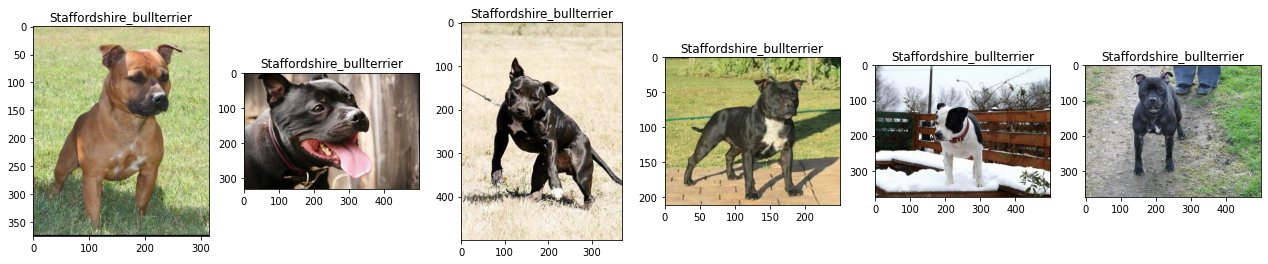

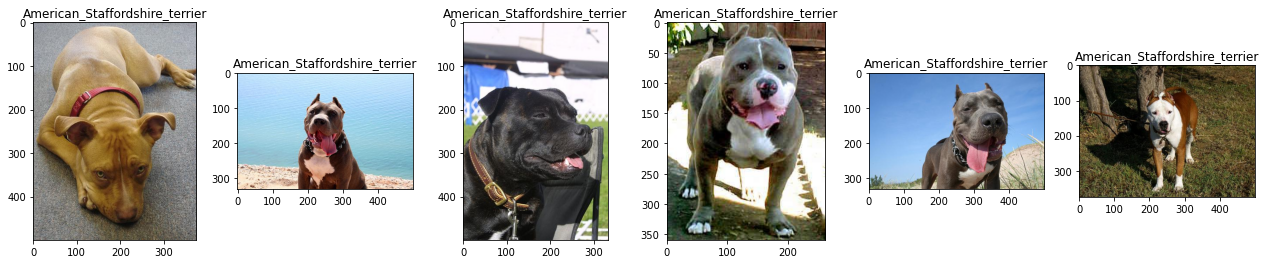

In [11]:
breed_image_list_01 = data_df[data_df['label'] == 'Staffordshire_bullterrier']['path'].iloc[:6].tolist()
breed_image_list_02 = data_df[data_df['label'] == 'American_Staffordshire_terrier']['path'].iloc[:6].tolist()

show_grid_images(breed_image_list_01, ncols = 6, title = 'Staffordshire_bullterrier')
show_grid_images(breed_image_list_02, ncols = 6, title = 'American_Staffordshire_terrier')

In [12]:
data_df['label'].value_counts().index.tolist()

['Maltese_dog',
 'Afghan_hound',
 'Scottish_deerhound',
 'Pomeranian',
 'Samoyed',
 'Bernese_mountain_dog',
 'Irish_wolfhound',
 'Shih-Tzu',
 'Great_Pyrenees',
 'Leonberg',
 'basenji',
 'Tibetan_terrier',
 'Sealyham_terrier',
 'Airedale',
 'EntleBucher',
 'Saluki',
 'pug',
 'Lakeland_terrier',
 'cairn',
 'Norwegian_elkhound',
 'papillon',
 'Australian_terrier',
 'chow',
 'Newfoundland',
 'beagle',
 'Siberian_husky',
 'Ibizan_hound',
 'Blenheim_spaniel',
 'bloodhound',
 'whippet',
 'Lhasa',
 'Norwich_terrier',
 'Japanese_spaniel',
 'miniature_pinscher',
 'silky_terrier',
 'Boston_bull',
 'Italian_greyhound',
 'Bedlington_terrier',
 'Pembroke',
 'Dandie_Dinmont',
 'Kerry_blue_terrier',
 'malamute',
 'basset',
 'toy_terrier',
 'Norfolk_terrier',
 'Rhodesian_ridgeback',
 'Border_terrier',
 'bluetick',
 'Labrador_retriever',
 'Saint_Bernard',
 'Old_English_sheepdog',
 'African_hunting_dog',
 'West_Highland_white_terrier',
 'Irish_terrier',
 'Greater_Swiss_Mountain_dog',
 'Chesapeake_Bay_ret

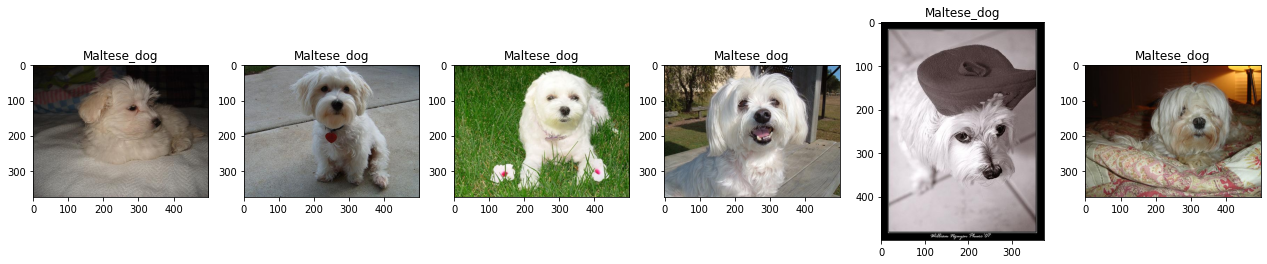

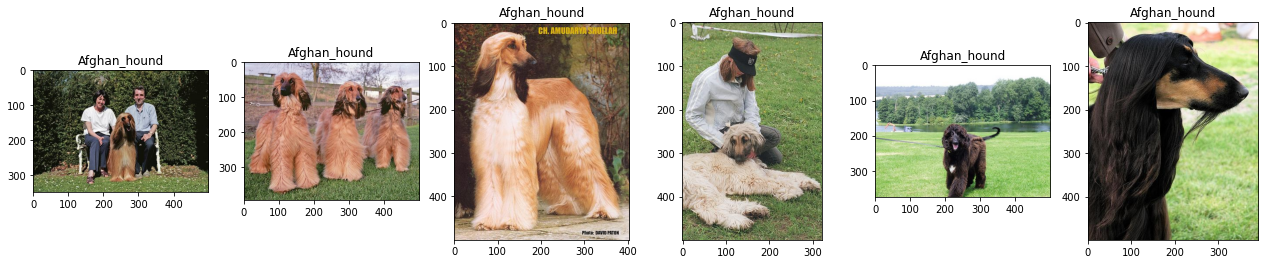

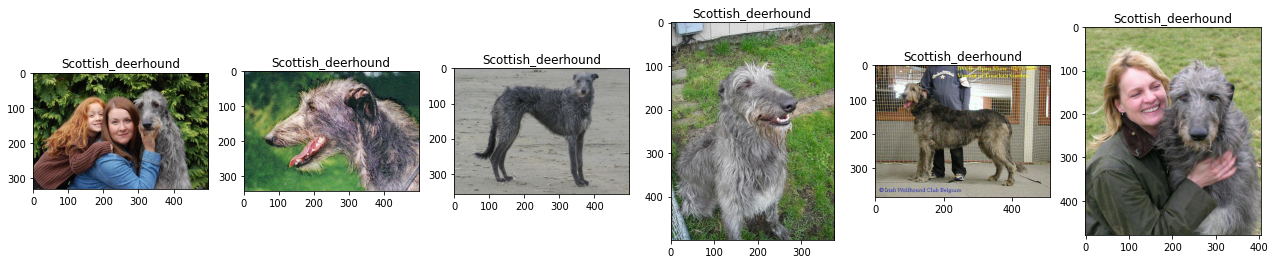

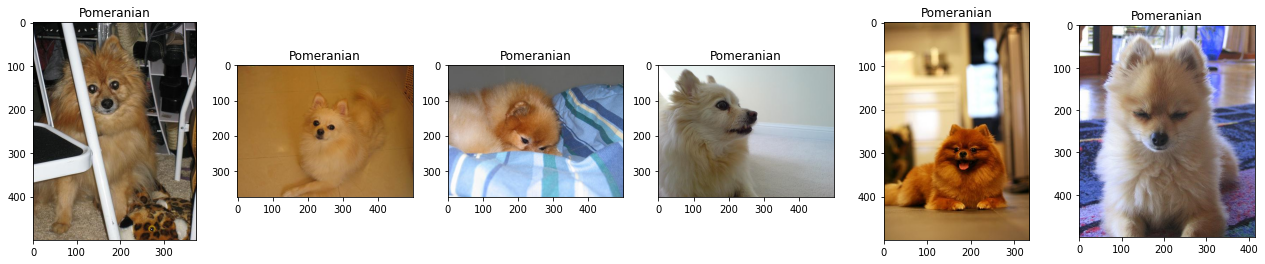

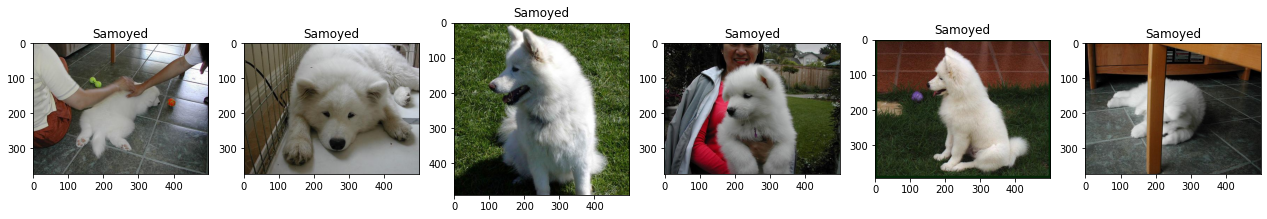

In [13]:
breed_list = data_df['label'].value_counts().index.tolist() # 모든 breed list를 가져오기.

for iter_cnt, breed in enumerate(breed_list):
    breed_image_list = data_df[data_df['label'] == breed]['path'].iloc[:6].tolist()
    show_grid_images(breed_image_list, ncols = 6, title = breed)
    if iter_cnt == 4:
        break

### 이미지 사이즈를 224x224로 고정하고 Augmentation 적용한 이미지 살펴 보기

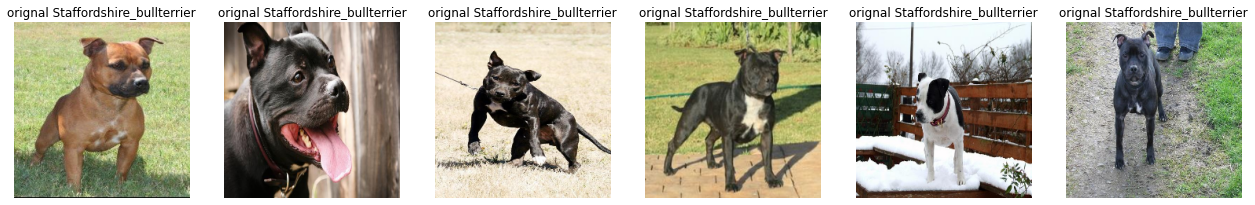

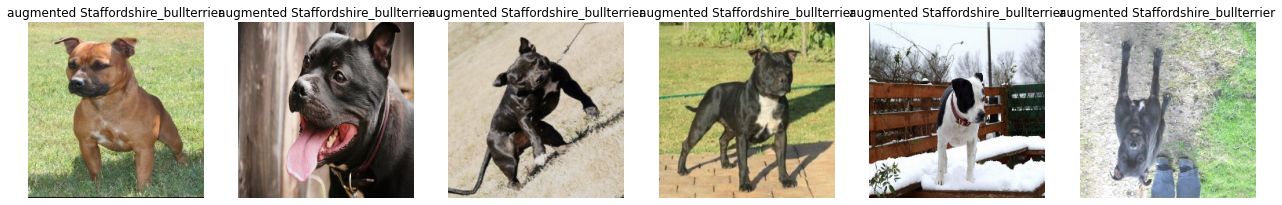

In [15]:
import albumentations as A

# 위에 이미지를 보면 사람과 개가 같이 있는 경우도 있으므로, crop을 사용할 경우 사람만 남는 이미지가 나올 수 있기에 사용에 주의.
tmp_augmentor = A.Compose([
    A.HorizontalFlip(p = 0.5),
    A.VerticalFlip(p = 0.5),
    A.ShiftScaleRotate(p = 0.5),
    #A.CenterCrop(height=200, width=200, p=0.5),
    A.RandomBrightnessContrast(brightness_limit = (-0.2, 0.2), contrast_limit = (-0.2, 0.2), p = 0.5),
    A.HueSaturationValue(hue_shift_limit = 0.2, sat_shift_limit = 0.2, val_shift_limit = 0.2, p = 0.5)
])

# augmented 적용된 이미지를 보기 위해서 위에서 albumetation으로 image 변환 기법 적용된 transformer 입력
# 이미지 사이즈를 224x224로 resize 적용. 
def show_grid_images(image_path_list, augmentor = None, ncols = 4, title = None):
    figure, axs = plt.subplots(figsize = (22, 4), nrows = 1, ncols = ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        if augmentor is not None:
            image = augmentor(image=image)['image']
        axs[i].imshow(image)
        axs[i].axis('off')
        axs[i].set_title(title) 
        
breed_image_list_01 = data_df[data_df['label'] == 'Staffordshire_bullterrier']['path'].iloc[:6].tolist()       
show_grid_images(breed_image_list_01, augmentor = None, ncols = 6, title = 'orignal Staffordshire_bullterrier')
show_grid_images(breed_image_list_01, augmentor = tmp_augmentor, ncols = 6, title = 'augmented Staffordshire_bullterrier')

### 전체 DataFrame을 학습과 테스트용 DataFrame으로 분리. 학습 DataFrame은 다시 학습과 검증용으로 분리 
* train_test_split()을 이용하여 전체의 40%를 테스트 데이터로 할당. stratify인자로 breed label별로 균등하게 할당 설정. 

In [16]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data_df, test_size = 0.4, stratify = data_df['label'], random_state = 2021)
print(train_df.shape, test_df.shape)

(12348, 2) (8232, 2)


In [17]:
print(train_df['label'].value_counts() / train_df.shape[0])
print(test_df['label'].value_counts() / test_df.shape[0])

Maltese_dog           0.012229
Afghan_hound          0.011662
Scottish_deerhound    0.011257
Pomeranian            0.010609
Samoyed               0.010609
                        ...   
affenpinscher         0.007289
clumber               0.007289
golden_retriever      0.007289
redbone               0.007208
Pekinese              0.007208
Name: label, Length: 120, dtype: float64
Maltese_dog             0.012269
Afghan_hound            0.011540
Scottish_deerhound      0.011297
Pomeranian              0.010690
Bernese_mountain_dog    0.010569
                          ...   
boxer                   0.007289
Irish_water_spaniel     0.007289
Border_collie           0.007289
kuvasz                  0.007289
redbone                 0.007167
Name: label, Length: 120, dtype: float64


In [18]:
from sklearn.model_selection import train_test_split

# DataFrame에서 numpy array로 변환. 
train_path = train_df['path'].values
train_label = pd.get_dummies(train_df['label']).values # OHE 적용
# 학습 데이터를 다시 학습과 검증용으로 분할. 
tr_path, val_path, tr_label, val_label = train_test_split(train_path, train_label, stratify=train_label, test_size=0.2, random_state=0)
print('학습용 path shape:', tr_path.shape, '검증용 path shape:', val_path.shape, 
      '학습용 label shape:', tr_label.shape, '검증용 label shape:', val_label.shape)

학습용 path shape: (9878,) 검증용 path shape: (2470,) 학습용 label shape: (9878, 120) 검증용 label shape: (2470, 120)


### Sequence 기반의 Dataset 생성. 
* 추후에 efficientb0에서 efficientb1으로 모델 변경하기 위해 image size를 인자 추가
* Albumentations의 Crop등을 적용하기 위해 augmentation 적용 후 cv2.resize() 로직 변경.
* augmentation은 기본적인 좌우반전(Horizontal) 먼저 적용. 

In [19]:
from tensorflow.keras.utils import Sequence
import sklearn 
import cv2

BATCH_SIZE = 64
IMAGE_SIZE = 224

# 입력 인자 image_filenames, labels는 모두 numpy array로 들어옴. 
class Breed_Dataset(Sequence):
    def __init__(self, image_filenames, labels, image_size = IMAGE_SIZE, batch_size = BATCH_SIZE, 
                 augmentor = None, shuffle = False, pre_func = None):
        '''
        파라미터 설명
        image_filenames: opencv로 image를 로드할 파일의 절대 경로들
        labels: 해당 image의 label들
        batch_size: __getitem__(self, index) 호출 시 마다 가져올 데이터 batch 건수
        augmentor: albumentations 객체
        shuffle: 학습 데이터의 경우 epoch 종료시마다 데이터를 섞을지 여부
        '''
        # 객체 생성 인자로 들어온 값을 객체 내부 변수로 할당. 
        self.image_filenames = image_filenames
        self.labels = labels
        self.image_size = image_size
        self.batch_size = batch_size
        self.augmentor = augmentor
        self.pre_func = pre_func
        # train data의 경우 
        self.shuffle = shuffle
        if self.shuffle:
            # 객체 생성시에 한번 데이터를 섞음. 
            #self.on_epoch_end()
            pass
    
    # Sequence를 상속받은 Dataset은 batch_size 단위로 입력된 데이터를 처리함. 
    # __len__()은 전체 데이터 건수가 주어졌을 때 batch_size단위로 몇번 데이터를 반환하는지 나타남
    def __len__(self):
        # batch_size단위로 데이터를 몇번 가져와야하는지 계산하기 위해 전체 데이터 건수를 batch_size로 나누되, 정수로 정확히 나눠지지 않을 경우 1회를 더한다. 
        return int(np.ceil(len(self.labels) / self.batch_size))
    
    # batch_size 단위로 image_array, label_array 데이터를 가져와서 변환한 뒤 다시 반환함
    # 인자로 몇번째 batch 인지를 나타내는 index를 입력하면 해당 순서에 해당하는 batch_size 만큼의 데이타를 가공하여 반환
    # batch_size 갯수만큼 변환된 image_array와 label_array 반환. 
    def __getitem__(self, index):
        # index는 몇번째 batch인지를 나타냄. 
        # batch_size만큼 순차적으로 데이터를 가져오려면 array에서 index * self.batch_size : (index +1 ) * self.batch_size 만큼의 연속 데이터를 가져오면 됨
        image_name_batch = self.image_filenames[index * self.batch_size : (index + 1) * self.batch_size]
        if self.labels is not None:
            label_batch = self.labels[index * self.batch_size : (index + 1) * self.batch_size]
        
        # 만일 객체 생성 인자로 albumentation으로 만든 augmentor가 주어진다면 아래와 같이 augmentor를 이용하여 image 변환
        # albumentations은 개별 image만 변환할 수 있으므로 batch_size만큼 할당된 image_name_batch를 한 건씩 iteration하면서 변환 수행. 
        # image_batch 배열은 float32 로 설정. 
        image_batch = np.zeros((image_name_batch.shape[0], self.image_size, self.image_size, 3), dtype='float32')
        
        # batch_size에 담긴 건수만큼 iteration 하면서 opencv image load -> image augmentation 변환(augmentor가 not None일 경우)-> image_batch에 담음. 
        for image_index in range(image_name_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(image_name_batch[image_index]), cv2.COLOR_BGR2RGB)
            if self.augmentor is not None:
                image = self.augmentor(image = image)['image']
            #crop 시 잘린 이미지가 원본 이미지와 다르게 되므로 augmentation 적용 후 resize() 적용. 
            image = cv2.resize(image, (self.image_size, self.image_size))
            # 만일 preprocessing_input이 pre_func인자로 들어오면 이를 이용하여 scaling 적용. 
            if self.pre_func is not None:
                image = self.pre_func(image)
                
            image_batch[image_index] = image
        
        return image_batch, label_batch
    
    # epoch가 한번 수행이 완료 될 때마다 모델의 fit()에서 호출됨. 
    def on_epoch_end(self):
        if(self.shuffle):
            #print('epoch end')
            # 전체 image 파일의 위치와 label를 쌍을 맞춰서 섞어준다. scikt learn의 utils.shuffle에서 해당 기능 제공
            self.image_filenames, self.labels = sklearn.utils.shuffle(self.image_filenames, self.labels)
        else:
            pass

### 좌우 반전(Horizontal Flip)을 수행하는 Augmentation 생성. 

In [20]:
import albumentations as A

augmentor_light = A.Compose([
    A.HorizontalFlip(p=0.5),
])

In [21]:
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.xception import preprocess_input as xcp_preprocess_input
# 학습용, 검증용 Breed_Dataset 생성.
tr_ds = Breed_Dataset(tr_path, tr_label, image_size = IMAGE_SIZE, batch_size = BATCH_SIZE, 
                      augmentor = augmentor_light, shuffle = True, pre_func = xcp_preprocess_input)
val_ds = Breed_Dataset(val_path, val_label, image_size = IMAGE_SIZE, batch_size = BATCH_SIZE, 
                       augmentor = None, shuffle = False, pre_func = xcp_preprocess_input)

tr_image_batch = next(iter(tr_ds))[0]
val_image_batch = next(iter(val_ds))[0]
print(tr_image_batch.shape, val_image_batch.shape)

print(tr_image_batch[:1])
print(val_image_batch[:1])

(64, 224, 224, 3) (64, 224, 224, 3)
[[[[-0.26274508 -0.24705881 -0.25490195]
   [-0.26274508 -0.24705881 -0.25490195]
   [-0.25490195 -0.25490195 -0.25490195]
   ...
   [-0.27058822 -0.27058822 -0.27058822]
   [-0.27058822 -0.27058822 -0.27058822]
   [-0.27058822 -0.27058822 -0.27058822]]

  [[-0.26274508 -0.24705881 -0.25490195]
   [-0.26274508 -0.24705881 -0.25490195]
   [-0.25490195 -0.25490195 -0.25490195]
   ...
   [-0.27058822 -0.27058822 -0.27058822]
   [-0.27058822 -0.27058822 -0.27058822]
   [-0.27058822 -0.27058822 -0.27058822]]

  [[-0.25490195 -0.23921567 -0.24705881]
   [-0.25490195 -0.23921567 -0.24705881]
   [-0.24705881 -0.24705881 -0.24705881]
   ...
   [-0.26274508 -0.26274508 -0.26274508]
   [-0.26274508 -0.26274508 -0.26274508]
   [-0.26274508 -0.26274508 -0.26274508]]

  ...

  [[-0.23921567  0.00392163  0.427451  ]
   [-0.24705881  0.01176476  0.427451  ]
   [-0.2235294   0.07450986  0.45098042]
   ...
   [ 0.5058824   0.7254902   0.9764706 ]
   [ 0.49803925  0.70

### Dataset으로 Storage에 있는 이미지 데이터를 fetch하고 가공하는데 걸리는 시간을 측정. 
* 배치 크기가 64일 경우 0.4초 정도 확보 필요. Local disk가 아닌 Object Storage일 경우 1초가 넘어서 GPU 자원 Utilization이 어려움. 

In [22]:
import time

tr_ds = Breed_Dataset(tr_path, tr_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, augmentor=augmentor_light, shuffle=True, pre_func=xcp_preprocess_input)
val_ds = Breed_Dataset(val_path, val_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, augmentor=None, shuffle=False, pre_func=xcp_preprocess_input)

# Dataset을 64건씩 Fetch하면서 걸리는 시간 측정 
start = time.time()
for value1, value2 in iter(tr_ds):
    end = time.time()
    print(end - start)
    start = end

0.20380401611328125
0.2145991325378418
0.2117762565612793
0.22533369064331055
0.23261642456054688
0.20635175704956055
0.21985745429992676
0.2908620834350586
0.26662468910217285
0.2694361209869385
0.24036765098571777
0.22935104370117188
0.21670794486999512
0.22974538803100586
0.26028966903686523
0.24978184700012207
0.22434282302856445
0.2525484561920166
0.22422313690185547
0.2151930332183838
0.22687458992004395
0.23201513290405273
0.22063565254211426
0.2068483829498291
0.226654052734375
0.2198777198791504
0.22319650650024414
0.22527694702148438
0.26517343521118164
0.2311854362487793
0.24943900108337402
0.22176241874694824
0.21347808837890625
0.22489547729492188
0.22897791862487793
0.25313758850097656
0.2490537166595459
0.2181410789489746
0.22825837135314941
0.21603608131408691
0.1999526023864746
0.2151637077331543
0.22861623764038086
0.21366047859191895
0.23415470123291016
0.28009033203125
0.32328319549560547
0.3176391124725342
0.2514498233795166
0.2126002311706543
0.2368485927581787
0.

### Pretrained 모델 생성. 
* resnet50, xception, efficientnetb0, efficientnetb1 등으로 pretrained 모델을 생성할 수 있는 함수 생성. 

In [23]:
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

from tensorflow.keras.applications import Xception, ResNet50V2, EfficientNetB0, EfficientNetB1
from tensorflow.keras.applications import MobileNet
import tensorflow as tf

# dog breed 종류는 120가지

def create_model(model_type='xception', in_shape = (224, 224, 3), n_classes = 120):
    input_tensor = Input(shape = in_shape)
    if model_type == 'resnet50v2':
        base_model = tf.keras.applications.ResNet50V2(include_top = False, weights = 'imagenet', input_tensor = input_tensor)
    elif model_type == 'xception':
        base_model = tf.keras.applications.Xception(include_top = False, weights = 'imagenet', input_tensor = input_tensor)
    elif model_type == 'efficientnetb0':
        base_model = tf.keras.applications.EfficientNetB0(include_top = False, weights = 'imagenet', input_tensor = input_tensor)
    elif model_type == 'efficientnetb1':
        base_model = tf.keras.applications.EfficientNetB1(include_top = False, weights = 'imagenet', input_tensor = input_tensor)
        
    x = base_model.output  
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation = 'relu')(x)
    x = Dropout(0.5)(x)    
    preds = Dense(units = n_classes, activation = 'softmax')(x)
    model = Model(inputs = input_tensor, outputs = preds)
    
    return model

### 학습/검증 데이터 분할, Dataset 생성, 모델 생성, 모델 Opt, Loss설정, Learning Rate Callback 설정 함수 생성. 
* Prtrained 모델 유형, 메타 DataFrame, 초기 학습율, Augmentor, scaling 함수를 인자로 입력. 
* Learning Rate Scheduler는 ReduceLROnPlateau 적용. 

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import Sequence
import sklearn 
import cv2

import albumentations as A

IMAGE_DIR = '/kaggle/working/Images' 

def make_dogbreed_dataframe(image_dir = IMAGE_DIR):
    paths = []
    label_distinguish = []
    for dirname, _, filenames in os.walk(image_dir):
        for filename in filenames:
            # 이미지 파일이 아닌 파일도 해당 디렉토리에 있음.
            if '.jpg' in filename:
                # 파일의 절대 경로를 file_path 변수에 할당. 
                file_path = dirname + '/' + filename
                paths.append(file_path)
                # 이미지 파일의 절대 경로에서 레이블명 생성을 위한 1차 추출. '/'로 분할하여 파일 바로 위 서브디렉토리 이름 가져옴.  
                start_pos = file_path.find('/', 20)
                end_pos = file_path.rfind('/')
                tmp_breed = file_path[start_pos + 1 : end_pos]
                # 1차 추출된 데이터를 기반으로 '-' 이후 데이터가 레이블 값임. 
                breed = tmp_breed[tmp_breed.find('-') + 1 :]
                #print(start_pos, end_pos, tmp_breed)
                label_distinguish.append(breed)

    data_df = pd.DataFrame({'path':paths, 'label':label_distinguish})
    return data_df

# 학습과 검증 데이터용 numpy array 분리. 
def get_train_valid(train_df, valid_size = 0.2, random_state = 2021):
    train_path = train_df['path'].values
    train_label = pd.get_dummies(train_df['label']).values
    
    tr_path, val_path, tr_label, val_label = train_test_split(train_path, train_label, test_size = valid_size, random_state = random_state)
    print('tr_path shape:', tr_path.shape, 'tr_label shape:', tr_label.shape, 'val_path shape:', val_path.shape, 'val_label shape:', val_label.shape)
    return tr_path, val_path, tr_label, val_label


BATCH_SIZE = 64
IMAGE_SIZE = 224

# 입력 인자 image_filenames, labels는 모두 numpy array로 들어옴. 
class Breed_Dataset(Sequence):
    def __init__(self, image_filenames, labels, image_size = IMAGE_SIZE, batch_size = BATCH_SIZE, 
                 augmentor = None, shuffle = False, pre_func = None):
        '''
        파라미터 설명
        image_filenames: opencv로 image를 로드할 파일의 절대 경로들
        labels: 해당 image의 label들
        batch_size: __getitem__(self, index) 호출 시 마다 가져올 데이터 batch 건수
        augmentor: albumentations 객체
        shuffle: 학습 데이터의 경우 epoch 종료시마다 데이터를 섞을지 여부
        '''
        # 객체 생성 인자로 들어온 값을 객체 내부 변수로 할당. 
        self.image_filenames = image_filenames
        self.labels = labels
        self.image_size = image_size
        self.batch_size = batch_size
        self.augmentor = augmentor
        self.pre_func = pre_func
        # train data의 경우 
        self.shuffle = shuffle
        if self.shuffle:
            # 객체 생성시에 한번 데이터를 섞음. 
            #self.on_epoch_end()
            pass
    
    # Sequence를 상속받은 Dataset은 batch_size 단위로 입력된 데이터를 처리함. 
    # __len__()은 전체 데이터 건수가 주어졌을 때 batch_size단위로 몇번 데이터를 반환하는지 나타남
    def __len__(self):
        # batch_size단위로 데이터를 몇번 가져와야하는지 계산하기 위해 전체 데이터 건수를 batch_size로 나누되, 정수로 정확히 나눠지지 않을 경우 1회를 더한다. 
        return int(np.ceil(len(self.labels) / self.batch_size))
    
    # batch_size 단위로 image_array, label_array 데이터를 가져와서 변환한 뒤 다시 반환함
    # 인자로 몇번째 batch 인지를 나타내는 index를 입력하면 해당 순서에 해당하는 batch_size 만큼의 데이타를 가공하여 반환
    # batch_size 갯수만큼 변환된 image_array와 label_array 반환. 
    def __getitem__(self, index):
        # index는 몇번째 batch인지를 나타냄. 
        # batch_size만큼 순차적으로 데이터를 가져오려면 array에서 index * self.batch_size : (index + 1) * self.batch_size 만큼의 연속 데이터를 가져오면 됨
        image_name_batch = self.image_filenames[index * self.batch_size : (index + 1) * self.batch_size]
        if self.labels is not None:
            label_batch = self.labels[index * self.batch_size : (index + 1) * self.batch_size]
        
        # 만일 객체 생성 인자로 albumentation으로 만든 augmentor가 주어진다면 아래와 같이 augmentor를 이용하여 image 변환
        # albumentations은 개별 image만 변환할 수 있으므로 batch_size만큼 할당된 image_name_batch를 한 건씩 iteration하면서 변환 수행. 
        # image_batch 배열은 float32 로 설정. 
        image_batch = np.zeros((image_name_batch.shape[0], self.image_size, self.image_size, 3), dtype = 'float32')
        
        # batch_size에 담긴 건수만큼 iteration 하면서 opencv image load -> image augmentation 변환(augmentor가 not None일 경우)-> image_batch에 담음. 
        for image_index in range(image_name_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(image_name_batch[image_index]), cv2.COLOR_BGR2RGB)
            if self.augmentor is not None:
                image = self.augmentor(image=image)['image']
            #crop 시 잘린 이미지가 원본 이미지와 다르게 되므로 augmentation 적용 후 resize() 적용. 
            image = cv2.resize(image, (self.image_size, self.image_size))
            # 만일 preprocessing_input이 pre_func인자로 들어오면 이를 이용하여 scaling 적용. 
            if self.pre_func is not None:
                image = self.pre_func(image)
                
            image_batch[image_index] = image
        
        return image_batch, label_batch
    
    # epoch가 한번 수행이 완료 될 때마다 모델의 fit()에서 호출됨. 
    def on_epoch_end(self):
        if(self.shuffle):
            #print('epoch end')
            # 전체 image 파일의 위치와 label를 쌍을 맞춰서 섞어준다. scikt learn의 utils.shuffle에서 해당 기능 제공
            self.image_filenames, self.labels = sklearn.utils.shuffle(self.image_filenames, self.labels)
        else:
            pass
        
        
augmentor_light = A.Compose([
    A.HorizontalFlip(p=0.5),
])

In [28]:
N_EPOCHS = 30

def train_model(model_type, train_df, initial_lr = 0.001, augmentor = None, input_pre_func =None):
    tr_path, val_path, tr_label, val_label = get_train_valid(train_df, valid_size = 0.2, random_state = 2021)
    
    tr_ds = Breed_Dataset(tr_path, tr_label, image_size = IMAGE_SIZE, batch_size = BATCH_SIZE, 
                          augmentor = augmentor, shuffle = True, pre_func = input_pre_func)
    val_ds = Breed_Dataset(val_path, val_label, image_size = IMAGE_SIZE, batch_size = BATCH_SIZE,  
                          augmentor = None, shuffle = False, pre_func = input_pre_func)

    # model_type인자로 들어온 모델 생성. optimizer Adam적용. 
    print('#######', model_type, ' 생성 및 학습 수행 ########')
    model = create_model(model_type = model_type)
    model.compile(optimizer = Adam(lr = initial_lr), loss = 'categorical_crossentropy', metrics = ['accuracy'])

    # 3번 iteration내에 validation loss가 향상되지 않으면 learning rate을 기존 learning rate * 0.2로 줄임.  
    rlr_cb = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, mode = 'min', verbose = 1)
    # 10번 iteration내에 validation loss가 향상되지 않으면 더 이상 학습하지 않고 종료
    ely_cb = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', verbose = 1)
    
    history = model.fit(tr_ds, epochs = N_EPOCHS, steps_per_epoch = int(np.ceil(tr_path.shape[0] / BATCH_SIZE)), 
                   validation_data = val_ds, validation_steps = int(np.ceil(val_path.shape[0] / BATCH_SIZE)),
                   callbacks = ([rlr_cb, ely_cb]), verbose = 1)
    
    return model, history

IMAGE_DIR = '/kaggle/working/Images' 

data_df = make_dogbreed_dataframe(image_dir = IMAGE_DIR)
train_df, test_df = train_test_split(data_df, test_size = 0.4, stratify = data_df['label'], random_state = 2021)
print(train_df.shape, test_df.shape)

(12348, 2) (8232, 2)


### Xception 모델로 학습/검증/테스트 성능 평가 수행. 

In [29]:
from tensorflow.keras.applications.xception import preprocess_input as xcp_preprocess_input

xception_model, xception_history = train_model(model_type = 'xception', train_df = train_df, initial_lr = 0.0001, augmentor = augmentor_light,
                             input_pre_func = xcp_preprocess_input)

tr_path shape: (9878,) tr_label shape: (9878, 120) val_path shape: (2470,) val_label shape: (2470, 120)
####### xception  생성 및 학습 수행 ########


2022-02-02 07:01:23.600085: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-02 07:01:23.692160: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-02 07:01:23.692878: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-02 07:01:23.694063: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

83697664/83683744 [==============================] - 0s 0us/step


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
2022-02-02 07:01:28.064912: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-02-02 07:01:32.960730: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


155/155 [==============================] - 140s 834ms/step - loss: 2.8173 - accuracy: 0.4366 - val_loss: 0.8164 - val_accuracy: 0.7794
Epoch 2/30
155/155 [==============================] - 128s 825ms/step - loss: 0.7650 - accuracy: 0.7952 - val_loss: 0.6818 - val_accuracy: 0.8113
Epoch 3/30
155/155 [==============================] - 127s 818ms/step - loss: 0.3979 - accuracy: 0.8878 - val_loss: 0.6162 - val_accuracy: 0.8202
Epoch 4/30
155/155 [==============================] - 127s 818ms/step - loss: 0.2257 - accuracy: 0.9380 - val_loss: 0.6541 - val_accuracy: 0.8170
Epoch 5/30
155/155 [==============================] - 128s 822ms/step - loss: 0.1367 - accuracy: 0.9671 - val_loss: 0.6295 - val_accuracy: 0.8251
Epoch 6/30
155/155 [==============================] - 128s 824ms/step - loss: 0.0821 - accuracy: 0.9800 - val_loss: 0.6734 - val_accuracy: 0.8154

Epoch 00006: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
Epoch 7/30
155/155 [==============================] -

### 테스트 Dataset으로 Evaluation 및 Prediction 수행. 

In [30]:
# 카테고리별 데이터가 적을 때 나타나는 전형적인 오버피팅 현상 발생
test_path = test_df['path'].values
test_label = pd.get_dummies(test_df['label']).values

# gt_class 컬럼으로 label값을 OHE에서 가장 큰 위치의 인덱스 값으로 Label encoding 
test_df['gt_class'] = np.argmax(test_label, axis = 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
test_df.head()

path  \
426    /kaggle/working/Images/n02100236-German_short-haired_pointer/n02100236_2807.jpg   
4412                         /kaggle/working/Images/n02108089-boxer/n02108089_1072.jpg   
8679                    /kaggle/working/Images/n02109961-Eskimo_dog/n02109961_1678.jpg   
8621                    /kaggle/working/Images/n02109961-Eskimo_dog/n02109961_5080.jpg   
20287                /kaggle/working/Images/n02096437-Dandie_Dinmont/n02096437_842.jpg   

                             label  gt_class  
426    German_short-haired_pointer        27  
4412                         boxer        82  
8679                    Eskimo_dog        24  
8621                    Eskimo_dog        24  
20287               Dandie_Dinmont        18

In [32]:
# 테스트 Dataset 생성 후 evaluation으로 성능 평가. 
test_ds = Breed_Dataset(test_path, test_label, image_size = IMAGE_SIZE, batch_size = BATCH_SIZE, 
                        augmentor = None, shuffle = False, pre_func = xcp_preprocess_input)

xception_model.evaluate(test_ds)

129/129 [==============================] - 42s 322ms/step - loss: 0.6829 - accuracy: 0.8107


[0.6828991174697876, 0.8107385635375977]

### 어떤 Breed가 예측이 많이 틀렸는지 확인 
* 실제 Ground Truth Breed와 예측 Breed가 어떻게 틀려졌는지 확인. 

In [33]:
# 테스트 Dataset으로 개별 image들의 predict 수행. 
predict_result = xception_model.predict(test_ds, steps = int(np.ceil(len(test_label) / BATCH_SIZE)))
predict_class = np.argmax(predict_result, axis = 1)
test_df['xcp_pred_class'] = predict_class

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [34]:
test_df.head()

path  \
426    /kaggle/working/Images/n02100236-German_short-haired_pointer/n02100236_2807.jpg   
4412                         /kaggle/working/Images/n02108089-boxer/n02108089_1072.jpg   
8679                    /kaggle/working/Images/n02109961-Eskimo_dog/n02109961_1678.jpg   
8621                    /kaggle/working/Images/n02109961-Eskimo_dog/n02109961_5080.jpg   
20287                /kaggle/working/Images/n02096437-Dandie_Dinmont/n02096437_842.jpg   

                             label  gt_class  xcp_pred_class  
426    German_short-haired_pointer        27              27  
4412                         boxer        82              75  
8679                    Eskimo_dog        24              24  
8621                    Eskimo_dog        24              64  
20287               Dandie_Dinmont        18              18

In [35]:
# 예측이 틀린 데이터 확인 
test_df[test_df['gt_class'] != test_df['xcp_pred_class']]

path  \
4412                 /kaggle/working/Images/n02108089-boxer/n02108089_1072.jpg   
8621            /kaggle/working/Images/n02109961-Eskimo_dog/n02109961_5080.jpg   
11404           /kaggle/working/Images/n02107908-Appenzeller/n02107908_737.jpg   
9187            /kaggle/working/Images/n02113624-toy_poodle/n02113624_5442.jpg   
10732  /kaggle/working/Images/n02116738-African_hunting_dog/n02116738_2482.jpg   
...                                                                        ...   
14346              /kaggle/working/Images/n02101556-clumber/n02101556_1018.jpg   
3991       /kaggle/working/Images/n02108551-Tibetan_mastiff/n02108551_1155.jpg   
19278   /kaggle/working/Images/n02096294-Australian_terrier/n02096294_1150.jpg   
6056                  /kaggle/working/Images/n02110958-pug/n02110958_15014.jpg   
6348           /kaggle/working/Images/n02105056-groenendael/n02105056_4713.jpg   

                     label  gt_class  xcp_pred_class  
4412                 boxer        82              75  
8621            Eskimo_dog        24              64  
11404          Appenzeller         4              31  
9187            toy_poodle       115             104  
10732  African_hunting_dog         1              91  
...                    ...       ...             ...  
14346              clumber        87              88  
3991       Tibetan_mastiff        67              46  
19278   Australian_terrier         5              49  
6056                   pug       108             118  
6348           groenendael        96             110  

[1558 rows x 4 columns]

In [36]:
test_df[test_df['gt_class'] != test_df['xcp_pred_class']]['label'].value_counts()

American_Staffordshire_terrier    34
miniature_poodle                  34
Siberian_husky                    34
Eskimo_dog                        33
collie                            33
                                  ..
Samoyed                            3
Leonberg                           2
Saint_Bernard                      2
Bedlington_terrier                 1
keeshond                           1
Name: label, Length: 120, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

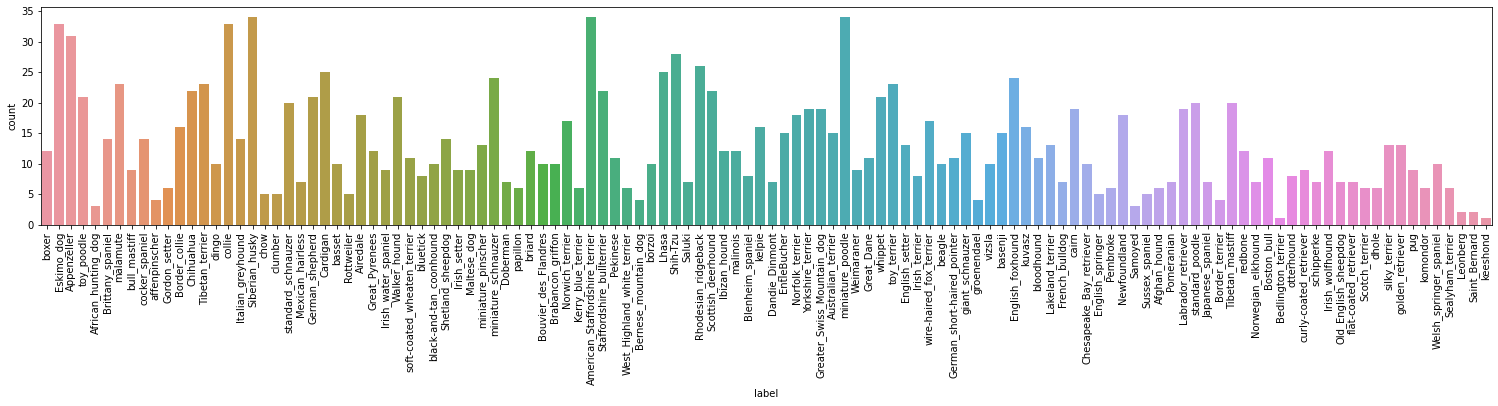

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize = (26, 4))
plt.xticks(rotation = 90)

wrong_result_df = test_df[test_df['gt_class'] != test_df['xcp_pred_class']]

sns.countplot(data = wrong_result_df, x = 'label')

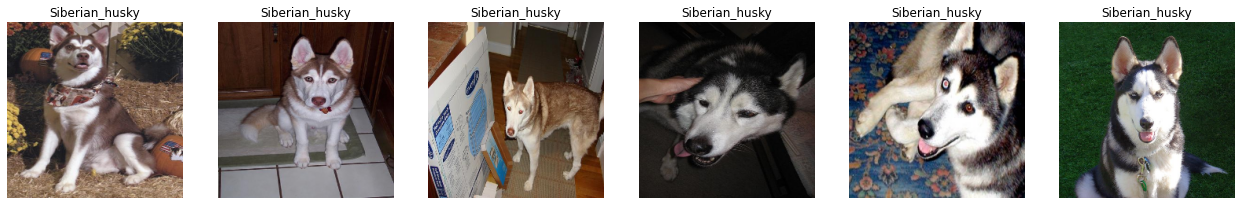

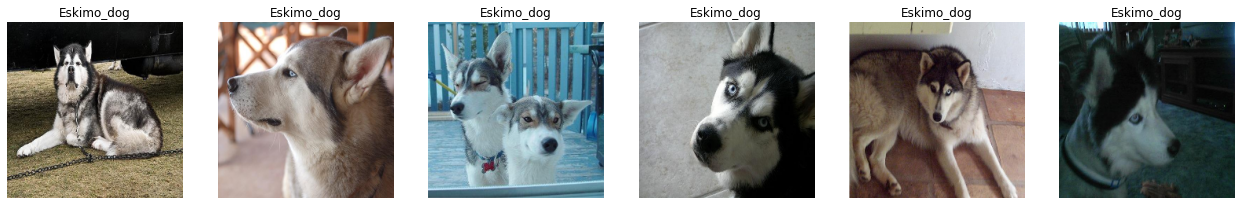

In [38]:
def show_grid_images(image_path_list, augmentor = None, ncols = 4, title = None):
    figure, axs = plt.subplots(figsize = (22, 4), nrows = 1, ncols = ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        if augmentor is not None:
            image = augmentor(image=image)['image']
        axs[i].imshow(image)
        axs[i].axis('off')
        axs[i].set_title(title) 
        
breed_image_list_01 = data_df[data_df['label'] == 'Siberian_husky']['path'].iloc[:6].tolist()
breed_image_list_02 = data_df[data_df['label'] == 'Eskimo_dog']['path'].iloc[:6].tolist()

show_grid_images(breed_image_list_01, ncols = 6, title = 'Siberian_husky')
show_grid_images(breed_image_list_02, ncols = 6, title = 'Eskimo_dog')

### EfficientNetB0 모델로 학습/검증/테스트 성능 평가 수행.

In [39]:
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess_input

effb0_model_t1, effb0_history_t1 = train_model(model_type = 'efficientnetb0', train_df = train_df, initial_lr = 0.0001, augmentor = augmentor_light,
                             input_pre_func = eff_preprocess_input)

tr_path shape: (9878,) tr_label shape: (9878, 120) val_path shape: (2470,) val_label shape: (2470, 120)
####### efficientnetb0  생성 및 학습 수행 ########
16719872/16705208 [==============================] - 0s 0us/step


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
155/155 [==============================] - 89s 524ms/step - loss: 4.0926 - accuracy: 0.1535 - val_loss: 2.1869 - val_accuracy: 0.4781
Epoch 2/30
155/155 [==============================] - 80s 516ms/step - loss: 1.8936 - accuracy: 0.5240 - val_loss: 1.0938 - val_accuracy: 0.7279
Epoch 3/30
155/155 [==============================] - 80s 512ms/step - loss: 1.1120 - accuracy: 0.6833 - val_loss: 0.8007 - val_accuracy: 0.7822
Epoch 4/30
155/155 [==============================] - 80s 514ms/step - loss: 0.8185 - accuracy: 0.7554 - val_loss: 0.7110 - val_accuracy: 0.7939
Epoch 5/30
155/155 [==============================] - 80s 512ms/step - loss: 0.6313 - accuracy: 0.8090 - val_loss: 0.6559 - val_accuracy: 0.7984
Epoch 6/30
155/155 [==============================] - 80s 512ms/step - loss: 0.5013 - accuracy: 0.8460 - val_loss: 0.6346 - val_accuracy: 0.7903
Epoch 7/30
155/155 [==============================] - 81s 515ms/step - loss: 0.4183 - accuracy: 0.8696 - val_loss: 0.6150 - val_ac

In [40]:
test_path = test_df['path'].values
test_label = pd.get_dummies(test_df['label']).values

test_ds = Breed_Dataset(test_path, test_label, image_size = IMAGE_SIZE, batch_size = BATCH_SIZE, 
                        augmentor = None, shuffle = False, pre_func = eff_preprocess_input)

effb0_model_t1.evaluate(test_ds)

129/129 [==============================] - 38s 294ms/step - loss: 0.6562 - accuracy: 0.8083


[0.656172513961792, 0.808309018611908]

In [41]:
# 테스트 Dataset으로 개별 image들의 predict 수행. 
predict_result = effb0_model_t1.predict(test_ds, steps= int(np.ceil(len(test_label) / BATCH_SIZE)))
predict_class = np.argmax(predict_result, axis = 1)
test_df['effb0_t1_pred_class'] = predict_class

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [42]:
test_df.head()

path  \
426    /kaggle/working/Images/n02100236-German_short-haired_pointer/n02100236_2807.jpg   
4412                         /kaggle/working/Images/n02108089-boxer/n02108089_1072.jpg   
8679                    /kaggle/working/Images/n02109961-Eskimo_dog/n02109961_1678.jpg   
8621                    /kaggle/working/Images/n02109961-Eskimo_dog/n02109961_5080.jpg   
20287                /kaggle/working/Images/n02096437-Dandie_Dinmont/n02096437_842.jpg   

                             label  gt_class  xcp_pred_class  \
426    German_short-haired_pointer        27              27   
4412                         boxer        82              75   
8679                    Eskimo_dog        24              24   
8621                    Eskimo_dog        24              64   
20287               Dandie_Dinmont        18              18   

       effb0_t1_pred_class  
426                     27  
4412                    82  
8679                    64  
8621                   101  
20287                   18

In [43]:
test_df[test_df['gt_class'] != test_df['effb0_t1_pred_class']]['label'].value_counts()

Eskimo_dog              38
collie                  34
Siberian_husky          33
Lhasa                   30
English_foxhound        29
                        ..
clumber                  3
Bernese_mountain_dog     3
Rottweiler               3
keeshond                 1
Leonberg                 1
Name: label, Length: 119, dtype: int64